# Import Package

In [210]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import r2_score

# Load Dataset

In [211]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk kecuali melakukan reduksi dimensi

## Missing Value Handling

In [212]:
#check the value of ZN and CHAS because there were any zero number therein

boston['ZN'].unique()


array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [213]:
boston['CHAS'].unique()

array([0., 1.])

In [193]:
#change the zero value in ZN and CHAS to be NAN to ease in calculating how much the missing value

boston['ZN'].replace(0, np.nan, inplace=True)
boston['CHAS'].replace(0, np.nan, inplace=True)

In [214]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [215]:
#calculate the percentage of the missing value 

boston.isnull().sum()/len(boston)*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


Generally, if there is 20-25% missing values, it will be replace using median or mode because the this is skewed. 

Because of the missing value in ZN and CHAS are more than 70%, so they will be removed in order not to affect the result

In [216]:
#drop the ZN and CHAS
boston = boston.drop("ZN", 1)
boston = boston.drop("CHAS", 1)

In [217]:
boston.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [218]:
boston.duplicated().sum()

0

## Feature + Target and Split Data

In [219]:
#Feature + Target & Split Data

from sklearn.model_selection import train_test_split

feature = boston.drop(columns='MEDV')
target = boston[['MEDV']]
feature_boston_train, feature_boston_test, target_boston_train, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [220]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   INDUS    506 non-null    float64
 2   NOX      506 non-null    float64
 3   RM       506 non-null    float64
 4   AGE      506 non-null    float64
 5   DIS      506 non-null    float64
 6   RAD      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


## Scaling

In [221]:
#Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(feature)
feature_std = scaler.transform(feature)

##Multicolinearity Handling

In [222]:
#Calculate VIF Scores

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.696228
2,INDUS,3.783890
3,NOX,4.420356
4,RM,1.915836
5,AGE,2.962431
6,DIS,3.402716
7,RAD,7.421966
8,TAX,8.163734
9,PTRATIO,1.620875
10,B,1.319026


`RAD` and `TAX` have high VIF Scores



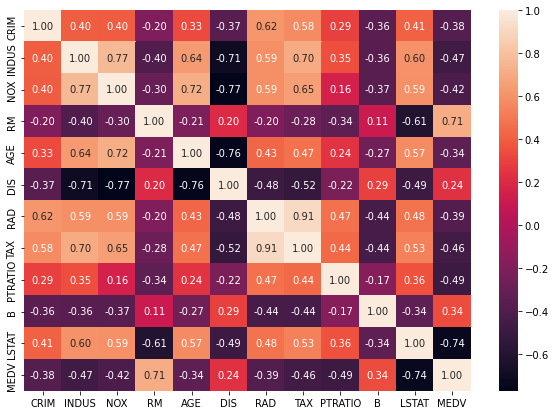

In [223]:
#Create Correlation Heat Map

boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

We choose to retain `TAX` because the correlation value of `TAX` to `MEDV` as a target feature, is higher than `RAD` to `MEDV`. Hence, we need to drop `RAD`

In [224]:
#Drop multicolinearity feature

feature_boston_train = feature_boston_train.drop(columns=['RAD'])
feature_boston_test = feature_boston_test.drop(columns=['RAD'])

In [225]:
#Recheck VIF Scores

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.588880
2,INDUS,3.606203
3,NOX,4.341366
4,RM,1.859606
5,AGE,2.954802
6,DIS,3.396490
7,TAX,3.079369
8,PTRATIO,1.508044
9,B,1.313114
10,LSTAT,2.773445


In [226]:
boston.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

## Preprocessing

In [227]:
feats = ['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'] 
new_boston = pd.DataFrame(data = feature_std, columns = feats)
new_boston.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [228]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(feature_std)
pcs = pca.transform(feature_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
pdf['MEDV'] = target
pdf.head()

,pc1,pc2,pc3,pc4,MEDV
0,-2.099934,1.151435,0.149954,0.441833,24.0
1,-1.648604,0.320681,-0.467917,0.028185,21.6
2,-2.279878,0.566395,0.581960,-0.401258,34.7
3,-2.825984,-0.287707,0.628564,-0.408558,33.4
4,-2.668947,-0.134753,0.589293,-0.410833,36.2


##Skree Plot

In [229]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [5.78007983 1.20704395 1.14558896 0.78703392]
Explained variance ratio: [0.52442334 0.10951441 0.10393863 0.07140714]


<BarContainer object of 4 artists>

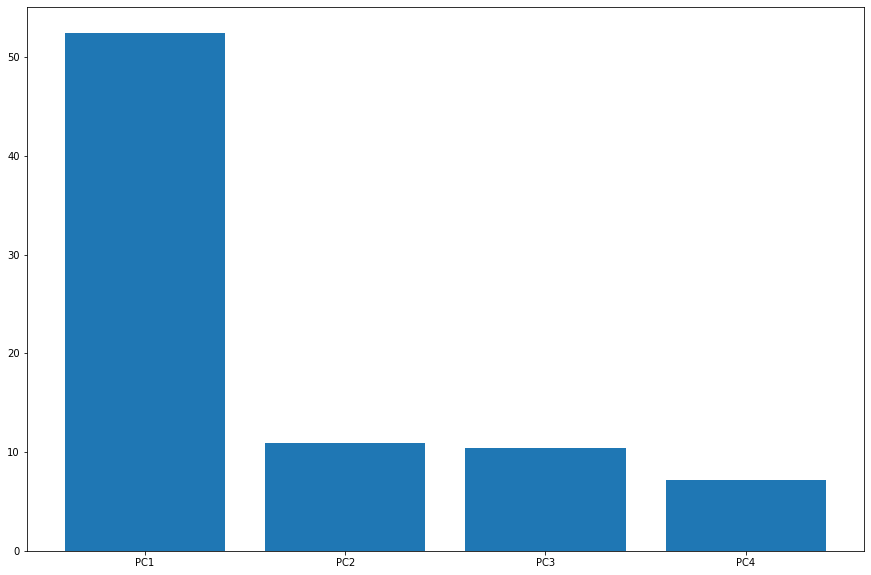

In [230]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], pca.explained_variance_ratio_ * 100)

From 10 Features --> 1 Feature --> PC 1 = 52.44% information is covered and the loss data is 47.56%.

From 10 Features --> 2 Feature --> PC 2 = 52.44%+10.95%=63.39% information is covered and the loss data is 36.61%.

From 10 Features --> 3 Feature --> PC 3 = 52.44%+10.95%+10.39%=73.78% information is covered and the loss data is 26.22%.

From 10 Features --> 4 Feature --> PC 4 = 52.44%+10.95%+10.39%+7.14%=80.92% information is covered and the loss data is 19.08%.


## Features Reduction

In [231]:
#features reduction using PC4

pca = PCA(n_components=4)
pca.fit(feature_std)
pcs = pca.transform(feature_std)

feature_std_pca_ridge = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2','pc3','pc4'])
feature_std_pca_ridge['MEDV'] = target
feature_std_pca_ridge.head()

,pc1,pc2,pc3,pc4,MEDV
0,-2.099934,1.151435,0.149954,0.441833,24.0
1,-1.648604,0.320681,-0.467917,0.028185,21.6
2,-2.279878,0.566395,0.581960,-0.401258,34.7
3,-2.825984,-0.287707,0.628564,-0.408558,33.4
4,-2.668947,-0.134753,0.589293,-0.410833,36.2


## Sampling Data

In [232]:
feature_pca_ridge = feature_std_pca_ridge.drop('MEDV', axis=1)
target_pca_ridge = feature_std_pca_ridge['MEDV']

feature_train_pca_ridge, feature_test_pca_ridge,target_train_pca_ridge,target_test_pca_ridge = train_test_split(feature_pca_ridge,target_pca_ridge,
                                                test_size = 0.4,
                                                random_state = 42)

In [180]:
feature_train, feature_test,target_train,target_test = train_test_split(feature_std,target,
                                                test_size = 0.4,
                                                random_state = 42)

# Regression Model (20 point)

## Modelling with PCA

In [233]:
from sklearn.linear_model import Ridge
model_pca_ridge = Ridge(random_state=42)
model_pca_ridge.fit(feature_train_pca_ridge, target_train_pca_ridge)

Ridge(random_state=42)

## Modelling without PCA

In [234]:
model_ridge = Ridge(random_state=42)
model_ridge.fit(feature_train, target_train)

Ridge(random_state=42)

## Predicting with PCA

In [235]:
target_pred_pca_ridge = model_pca_ridge.predict(feature_test_pca_ridge)

## Predicting without PCA

In [236]:
target_pred_ridge = model_ridge.predict(feature_test)

# Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

## Evaluation with PCA

In [237]:
print('R-squared for training data is {}'.format(r2_score(target_test_pca_ridge,target_pred_pca_ridge)))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data with PCA is {}'.format(np.sqrt(mean_squared_error(target_pred_pca_ridge, target_test_pca_ridge))))
print('MAE for testing data with PCA is {}'.format(mean_absolute_error(target_pred_pca_ridge, target_test_pca_ridge)))
print('MAPE for testing data with PCA is {}'.format(mean_absolute_percentage_error(target_pred_pca_ridge, target_test_pca_ridge)))

R-squared for training data is 0.6783644304673522
RMSE for testing data with PCA is 4.942282649777187
MAE for testing data with PCA is 3.2689350163881077
MAPE for testing data with PCA is 0.23055891238208534


## Evaluation without PCA

In [238]:
print('R-squared for testing data without PCA is {}'.format(r2_score(target_test,target_pred_ridge)))
print('RMSE for testing data without PCA is {}'.format(np.sqrt(mean_squared_error(target_test,target_pred_ridge))))
print('MAE for testing data without PCA is {}'.format(mean_absolute_error(target_test,target_pred_ridge)))
print('MAPE for testing data without PCA is {}'.format(mean_absolute_percentage_error(target_test,target_pred_ridge)))


R-squared for testing data without PCA is 0.7019870929017913
RMSE for testing data without PCA is 4.757327837019367
MAE for testing data without PCA is 3.322443995848271
MAPE for testing data without PCA is 0.17275899464052677


# Summary

1.   The accuracy reduces to 2.3% (from the R-Squared) when using PCA compared to without using PCA.

2.   However, the computation becomes more efficient because the features could be reduced from 10 to only four features. And it is enough to cover 80.92% of information.

3.  According to Chin (1998), the highest model usually has the r-squared of more than 0.67, which means the combination between each independent variable is strong enough to affect the value of the dependent variable. It implies the modeling using PCA is still categorized as the highest model because the R-Squared is more than 0.67.




